# Постановка задачи

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, init_printing, integrate, exp, sin
import math
import random

In [60]:
# Зафиксируем ядро рандомайзера, сохранив в памяти 10000 различных состояний RAM

random.seed()
rand_states = []
rand_states_ = []
for i in range(0,10000):
    r_s = random.getstate()
    rand_states.append(r_s)
    random.random()
    r_s = random.getstate()
    rand_states_.append(r_s)
    random.random()

# Первый интеграл

In [2]:
# Получим значение первого интеграла аналитически:
t = symbols('t')
init_printing(use_unicode=False)
integrate(exp(t),t)

In [3]:
# Неопределенный интеграл:
def I1(x):
    return math.exp(x)

In [4]:
# Определенный интеграл:
I_1 = I1(1) - I1(0)
I_1

In [6]:
def f1(x):
    return math.exp(x)

In [130]:
a = 0
b = 1
N_ = 10, 20, 100, 200, 500, 1000, 10000

## Метод, основанный на вычислении подынтегральной функции

In [89]:
for N in N_:
    f_sum = np.zeros(N)
    for i in range(0,N):
        random.setstate(rand_states[i])
        ksi = random.random()
        f_sum[i] = f1(ksi)
    S = (b-a)*f_sum.mean()
    print('N =',N, ': Integral =', round(S,3), '; Error =', round(I_1-S,5))

N = 10 : Integral = 1.482 ; Error = 0.23612
N = 20 : Integral = 1.493 ; Error = 0.22575
N = 100 : Integral = 1.65 ; Error = 0.06817
N = 200 : Integral = 1.68 ; Error = 0.03813
N = 500 : Integral = 1.728 ; Error = -0.00931
N = 1000 : Integral = 1.718 ; Error = 0.00065
N = 10000 : Integral = 1.714 ; Error = 0.00442


### Понижение дисперсии

#### С помощью выделения главной части

In [14]:
t = symbols('t')
init_printing(use_unicode=False)
integrate(1+t,(t,0,1))

In [101]:
J_1 = 1.5

In [15]:
def g1(x):
    return 1 + x

In [102]:
for N in N_:
    fg_sum = np.zeros(N)
    for i in range(0,N):
        random.setstate(rand_states[i])
        ksi = random.random()
        fg_sum[i] = f1(ksi) - g1(ksi)
    S = (b-a)*fg_sum.mean() + J_1
    print('N =',N, ': Integral =', round(S,3), '; Error =', round(I_1-S,5))

N = 10 : Integral = 1.635 ; Error = 0.08347
N = 20 : Integral = 1.634 ; Error = 0.0845
N = 100 : Integral = 1.693 ; Error = 0.02494
N = 200 : Integral = 1.705 ; Error = 0.01326
N = 500 : Integral = 1.725 ; Error = -0.00675
N = 1000 : Integral = 1.719 ; Error = -0.00068
N = 10000 : Integral = 1.717 ; Error = 0.00151


#### С помощью существенной выборки

In [110]:
for N in N_:
    fg_sum = np.zeros(N)
    for i in range(0,N):
        random.setstate(rand_states[i])
        ksi = random.random()
        fg_sum[i] = f1(ksi)/(1+ksi)
    S = 3*fg_sum.mean()/2
    print('N =',N, ': Integral =', round(S,3), '; Error =', round(I_1-S,5))

N = 10 : Integral = 1.614 ; Error = 0.10405
N = 20 : Integral = 1.617 ; Error = 0.10095
N = 100 : Integral = 1.667 ; Error = 0.0512
N = 200 : Integral = 1.677 ; Error = 0.04167
N = 500 : Integral = 1.692 ; Error = 0.02611
N = 1000 : Integral = 1.688 ; Error = 0.02994
N = 10000 : Integral = 1.687 ; Error = 0.03152


#### С помощью симметризации функции

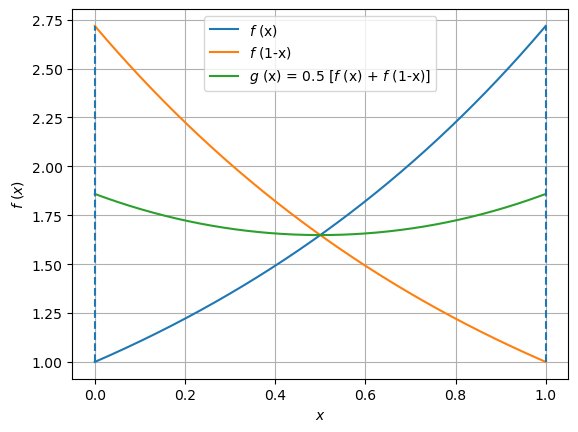

In [78]:
x = np.zeros(10000)
f1_ = np.zeros(10000)
f1_inv = np.zeros(10000)
g1_ = np.zeros(10000)
for i in range(0,10000):
    x[i] = i/10000
    f1_[i] = f1(x[i])
    f1_inv[i] = f1(1-x[i])
    g1_[i] = 0.5 * (f1_[i] + f1_inv[i])

plt.figure()
plt.plot(x, f1_, label='$f$ (x)')
plt.plot(x, f1_inv, label='$f$ (1-x)')
plt.plot(x, g1_, label='$g$ (x) = 0.5 [$f$ (x) + $f$ (1-x)]')
plt.grid()
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$f$ $(x)$')
plt.vlines(x = 0, ymin=1, ymax=math.e, linestyles='dashed')
plt.vlines(x = 1, ymin=1, ymax=math.e, linestyles='dashed')
figname = 'sym1.png'
plt.savefig(figname)

In [90]:
for N in N_:
    g_sum = np.zeros(N)
    for i in range(0,N):
        random.setstate(rand_states[i])
        ksi = random.random()
        g_sum[i] = 0.5 * (f1(ksi) + f1(1-ksi))
    S = (b-a)*g_sum.mean()
    print('N =',N, ': Integral =', round(S,3), '; Error =', round(I_1-S,5))

N = 10 : Integral = 1.736 ; Error = -0.01765
N = 20 : Integral = 1.73 ; Error = -0.01124
N = 100 : Integral = 1.723 ; Error = -0.00454
N = 200 : Integral = 1.722 ; Error = -0.00368
N = 500 : Integral = 1.723 ; Error = -0.00481
N = 1000 : Integral = 1.72 ; Error = -0.00169
N = 10000 : Integral = 1.719 ; Error = -0.00047


## Метод, основанный на вычислении площади

In [134]:
c = 2
for N in N_:
    n = 0
    for i in range(0,N):
        random.setstate(rand_states[i])
        ksi = random.random()
        random.setstate(rand_states_[i])
        eta = random.uniform(0,c)
        if eta < f1(ksi):
            n += 1
    S = c*(b-a)*n/N
    print('N =',N, ': Integral =', round(S,3), '; Error =', round(I_1-S,5))

N = 10 : Integral = 1.4 ; Error = 0.31828
N = 20 : Integral = 1.4 ; Error = 0.31828
N = 100 : Integral = 1.62 ; Error = 0.09828
N = 200 : Integral = 1.6 ; Error = 0.11828
N = 500 : Integral = 1.604 ; Error = 0.11428
N = 1000 : Integral = 1.59 ; Error = 0.12828
N = 10000 : Integral = 1.607 ; Error = 0.11168


### Понижение дисперсии

#### С помощью симметризации функции

In [135]:
for N in N_:
    n = 0
    for i in range(0,N):
        random.setstate(rand_states[i])
        ksi = random.random()
        random.setstate(rand_states_[i])
        eta = random.uniform(0,c)
        g = 0.5 * (f1(ksi) + f1(1-ksi))
        if eta < g:
            n += 1
    S = c*(b-a)*n/N
    print('N =',N, ': Integral =', round(S,3), '; Error =', round(I_1-S,5))

N = 10 : Integral = 1.6 ; Error = 0.11828
N = 20 : Integral = 1.7 ; Error = 0.01828
N = 100 : Integral = 1.76 ; Error = -0.04172
N = 200 : Integral = 1.74 ; Error = -0.02172
N = 500 : Integral = 1.736 ; Error = -0.01772
N = 1000 : Integral = 1.702 ; Error = 0.01628
N = 10000 : Integral = 1.707 ; Error = 0.01148


# Второй интеграл

In [91]:
# Получим значение второго интеграла аналитически:
t = symbols('t')
init_printing(use_unicode=False)
integrate(sin(t),t)

In [92]:
# Неопределенный интеграл:
def I2(x):
    return -1*math.cos(x)

In [93]:
# Определенный интеграл:
I_2 = I2(math.pi/2) - I2(0)
I_2

In [94]:
def f2(x):
    return math.sin(x)

In [124]:
a = 0
b = math.pi/2
N_ = 10, 20, 100, 200, 500, 1000, 10000

## Метод, основанный на вычислении подынтегральной функции

In [96]:
for N in N_:
    f_sum = np.zeros(N)
    for i in range(0,N):
        random.setstate(rand_states[i])
        ksi = random.uniform(0,math.pi/2)
        f_sum[i] = f2(ksi)
    S = (b-a)*f_sum.mean()
    print('N =',N, ': Integral =', round(S,3), '; Error =', round(I_2-S,5))

N = 10 : Integral = 0.71 ; Error = 0.28979
N = 20 : Integral = 0.746 ; Error = 0.2541
N = 100 : Integral = 0.921 ; Error = 0.07911
N = 200 : Integral = 0.953 ; Error = 0.04723
N = 500 : Integral = 0.996 ; Error = 0.00381
N = 1000 : Integral = 0.995 ; Error = 0.00459
N = 10000 : Integral = 0.994 ; Error = 0.00556


### Понижение дисперсии

#### С помощью выделения главной части

In [98]:
t = symbols('t')
init_printing(use_unicode=False)
integrate(1-(t**3)/6,(t,0,math.pi/2))

In [105]:
J_2 = 1.31712681889385

In [103]:
def g2(x):
    return 1 - (x**3)/6

In [119]:
for N in N_:
    fg_sum = np.zeros(N)
    for i in range(0,N):
        random.setstate(rand_states[i])
        ksi = random.uniform(0,math.pi/2)
        fg_sum[i] = f2(ksi) - g2(ksi)
    S = (b-a)*fg_sum.mean() + J_2
    print('N =',N, ': Integral =', round(S,3), '; Error =', round(I_2-S,5))

N = 10 : Integral = 0.619 ; Error = 0.38123
N = 20 : Integral = 0.644 ; Error = 0.35609
N = 100 : Integral = 0.891 ; Error = 0.10897
N = 200 : Integral = 0.938 ; Error = 0.06237
N = 500 : Integral = 1.008 ; Error = -0.00792
N = 1000 : Integral = 0.997 ; Error = 0.00308
N = 10000 : Integral = 0.993 ; Error = 0.00726


#### С помощью существенной выборки

In [120]:
for N in N_:
    fg_sum = np.zeros(N)
    for i in range(0,N):
        random.setstate(rand_states[i])
        ksi = random.uniform(0,math.pi/2)
        fg_sum[i] = f2(ksi)/ksi
    S = (math.pi**2)*fg_sum.mean()/8
    print('N =',N, ': Integral =', round(S,3), '; Error =', round(I_2-S,5))

N = 10 : Integral = 1.14 ; Error = -0.13963
N = 20 : Integral = 1.137 ; Error = -0.13665
N = 100 : Integral = 1.094 ; Error = -0.09435
N = 200 : Integral = 1.086 ; Error = -0.08632
N = 500 : Integral = 1.073 ; Error = -0.07316
N = 1000 : Integral = 1.076 ; Error = -0.07635
N = 10000 : Integral = 1.078 ; Error = -0.07772


#### С помощью симметризации функции

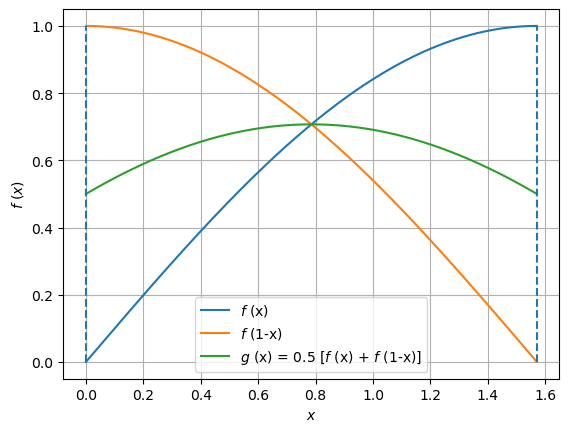

In [111]:
x = np.zeros(10000)
f2_ = np.zeros(10000)
f2_inv = np.zeros(10000)
g2_ = np.zeros(10000)
for i in range(0,10000):
    x[i] = i*math.pi/20000
    f2_[i] = f2(x[i])
    f2_inv[i] = f2(math.pi/2-x[i])
    g2_[i] = 0.5 * (f2_[i] + f2_inv[i])

plt.figure()
plt.plot(x, f2_, label='$f$ (x)')
plt.plot(x, f2_inv, label='$f$ (1-x)')
plt.plot(x, g2_, label='$g$ (x) = 0.5 [$f$ (x) + $f$ (1-x)]')
plt.grid()
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$f$ $(x)$')
plt.vlines(x = 0, ymin=0, ymax=1, linestyles='dashed')
plt.vlines(x = math.pi/2, ymin=0, ymax=1, linestyles='dashed')
figname = 'sym2.png'
plt.savefig(figname)

In [125]:
for N in N_:
    g_sum = np.zeros(N)
    for i in range(0,N):
        random.setstate(rand_states[i])
        ksi = random.uniform(0,math.pi/2)
        g_sum[i] = 0.5 * (f2(ksi) + f2(b-ksi))
    S = (b-a)*g_sum.mean()
    print('N =',N, ': Integral =', round(S,3), '; Error =', round(I_2-S,5))

N = 10 : Integral = 0.971 ; Error = 0.02897
N = 20 : Integral = 0.982 ; Error = 0.01815
N = 100 : Integral = 0.993 ; Error = 0.00734
N = 200 : Integral = 0.994 ; Error = 0.00586
N = 500 : Integral = 0.992 ; Error = 0.00755
N = 1000 : Integral = 0.997 ; Error = 0.00263
N = 10000 : Integral = 0.999 ; Error = 0.00071


## Метод, основанный на вычислении площади

In [127]:
c = 1
for N in N_:
    n = 0
    for i in range(0,N):
        random.setstate(rand_states[i])
        ksi = random.uniform(0,math.pi/2)
        random.setstate(rand_states_[i])
        eta = random.uniform(0,c)
        if eta < f2(ksi):
            n += 1
    S = c*(b-a)*n/N
    print('N =',N, ': Integral =', round(S,3), '; Error =', round(I_2-S,5))

N = 10 : Integral = 0.628 ; Error = 0.37168
N = 20 : Integral = 0.785 ; Error = 0.2146
N = 100 : Integral = 0.974 ; Error = 0.02611
N = 200 : Integral = 0.966 ; Error = 0.03396
N = 500 : Integral = 1.024 ; Error = -0.02416
N = 1000 : Integral = 0.991 ; Error = 0.00883
N = 10000 : Integral = 0.99 ; Error = 0.01024


### Понижение дисперсии

#### С помощью симметризации функции

In [129]:
for N in N_:
    n = 0
    for i in range(0,N):
        random.setstate(rand_states[i])
        ksi = random.uniform(0,math.pi/2)
        random.setstate(rand_states_[i])
        eta = random.uniform(0,c)
        g = 0.5 * (f2(ksi) + f2(b-ksi))
        if eta < g:
            n += 1
    S = c*(b-a)*n/N
    print('N =',N, ': Integral =', round(S,3), '; Error =', round(I_2-S,5))

N = 10 : Integral = 0.942 ; Error = 0.05752
N = 20 : Integral = 0.942 ; Error = 0.05752
N = 100 : Integral = 1.052 ; Error = -0.05243
N = 200 : Integral = 0.974 ; Error = 0.02611
N = 500 : Integral = 0.977 ; Error = 0.02296
N = 1000 : Integral = 0.96 ; Error = 0.04024
N = 10000 : Integral = 0.996 ; Error = 0.00364


# Выводы